In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os

from S2S_on_SFNO.Models.sfno.model import FourCastNetv2_filmed

In [2]:
checkpoint = "lemon-breeze-29"
iter = 1

In [3]:
cp_path = os.path.join("/mnt/qb/work2/goswami0/gkd965/checkpoints/",checkpoint)
gamma = np.load(os.path.join(cp_path,"gamma_1000.npy"))
# beta  = np.load(os.path.join(cp_path,"beta.npy"))

NameError: name 'beta' is not defined

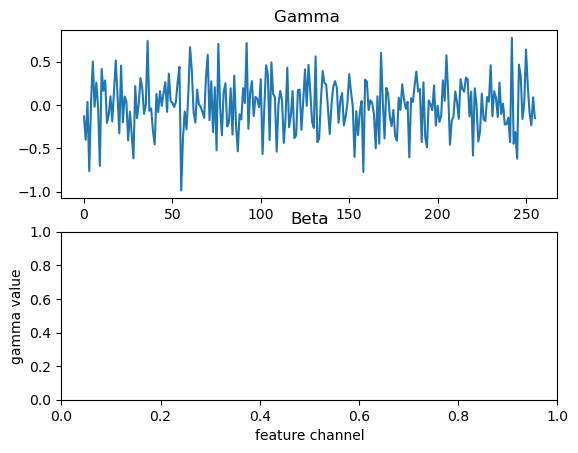

In [15]:
fig, ax = plt.subplots(2)
ax[0].set_title("Gamma ")
ax[1].set_title("Beta")
plt.xlabel("feature channel")
plt.ylabel("gamma value")
ax[0].plot(gamma)
# ax[1].plot(beta)

In [ ]:
plt.title("Gamma Distribution ")
plt.xlabel("feature channel")
plt.ylabel("gamma value")
plt.plot(gamma)

In [10]:
from IPython.display import display_pdf
img_path = os.path.join(cp_path,"figures",'sfno_MSE Normalised_validation_steps5.pdf')
with open(img_path, "rb") as f:
    display_pdf(f.read(),raw=True)

In [5]:
from IPython.display import display_pdf
img_path = os.path.join(cp_path,"figures",'checkpoint_sfno_film_gcn_epoch=2000_MSE_validation_steps5.pdf')
with open(img_path, "rb") as f:
    display_pdf(f.read(),raw=True)

In [37]:
img_path = os.path.join(cp_path,"figures",'checkpoint_sfno_film_gcn_epoch=2000_Skillscores_validation_steps5.pdf')
with open(img_path, "rb") as f:
    display_pdf(f.read(),raw=True)

In [8]:

img_path = os.path.join(cp_path,"figures",'10m_u_component_of_wind step=1.pdf')
with open(img_path, "rb") as f:
    display_pdf(f.read(),raw=True)

In [15]:
# args = {'test': False, 'model_type': 'sfno', 'model_version': 'film', 'film_gen_type': 'gcn_custom', 'assets': '/mnt/qb/work2/goswami0/gkd965/Assets/sfno', 'film_weights': None, 'sfno_weights': None, 'assets_sub_directory': 'S2S_on_SFNO/Assets', 'path': '/home/goswami/gkd965/MasterML/S2S_on_SFNO/outputs/sfno/leadtime_240_startDate_-112_createdOn_20240416T1132.grib', 'num_threads': 1, 'only_gpu': False, 'cpu': False, 'expver': None, 'class_': None, 'metadata': {}, 'model_args': None, 'assets_list': False, 'fields': False, 'eval_models_autoregressive': True, 'eval_checkpoint_path': '/mnt/qb/work2/goswami0/gkd965/checkpoints/lemon-breeze-29', 'eval_skip_checkpoints': 0, 'download_assets': False, 'input': 'cds', 'input_store': None, 'file': None, 'era5_path': '/mnt/qb/goswami/data/era5', 'archive_requests': None, 'retrieve_requests': False, 'requests_extra': None, 'json': False, 'lead_time': 240, 'date': '-1', 'time': 12, 'output': 'grib', 'output_variables': './S2S_on_SFNO/outputs/output-variables.json', 'dump_provenance': False, 'hindcast_reference_year': None, 'staging_dates': None,'run':False, 'train': False, 'trainingset_start_year': 1959, 'trainingset_end_year': 2019, 'validationset_start_year': 2019, 'validationset_end_year': 2022, 'validation_interval': 150, 'save_checkpoint_interval': 10, 'validation_epochs': 3, 'autoregressive_steps': 3, 'multi_step_training': 0, 'multi_step_skip': 0, 'val_loss_threshold': 0.4, 'trainingdata_path': '/mnt/qb/goswami/data/era5/weatherbench2/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr', 'training_workers': 0, 'batch_size': 1, 'learning_rate': 0.001, 'scheduler_type': 'CosineAnnealingWarmRestarts', 'scheduler_horizon': 2000, 'save_path': '/mnt/qb/work2/goswami0/gkd965/checkpoints/sfno_film_gcn_custom_20240416T1132', 'debug': True, 'wandb': False, 'wandb_resume': None, 'notes': None, 'tags': None, 'advanced_logging': False, 'timestr': '20240416T1132'}
# model = FourCastNetv2_filmed(**args)
# 

In [22]:
# model.plot_loss_allvariables(
# data = np.load(os.path.join(cp_path,"figures","_MSE_normalised_sfno.pkl.npy"))
# data.shape

mean  = np.array(data).mean(axis=0)
std   = np.array(data).std(axis=0)
title="test"

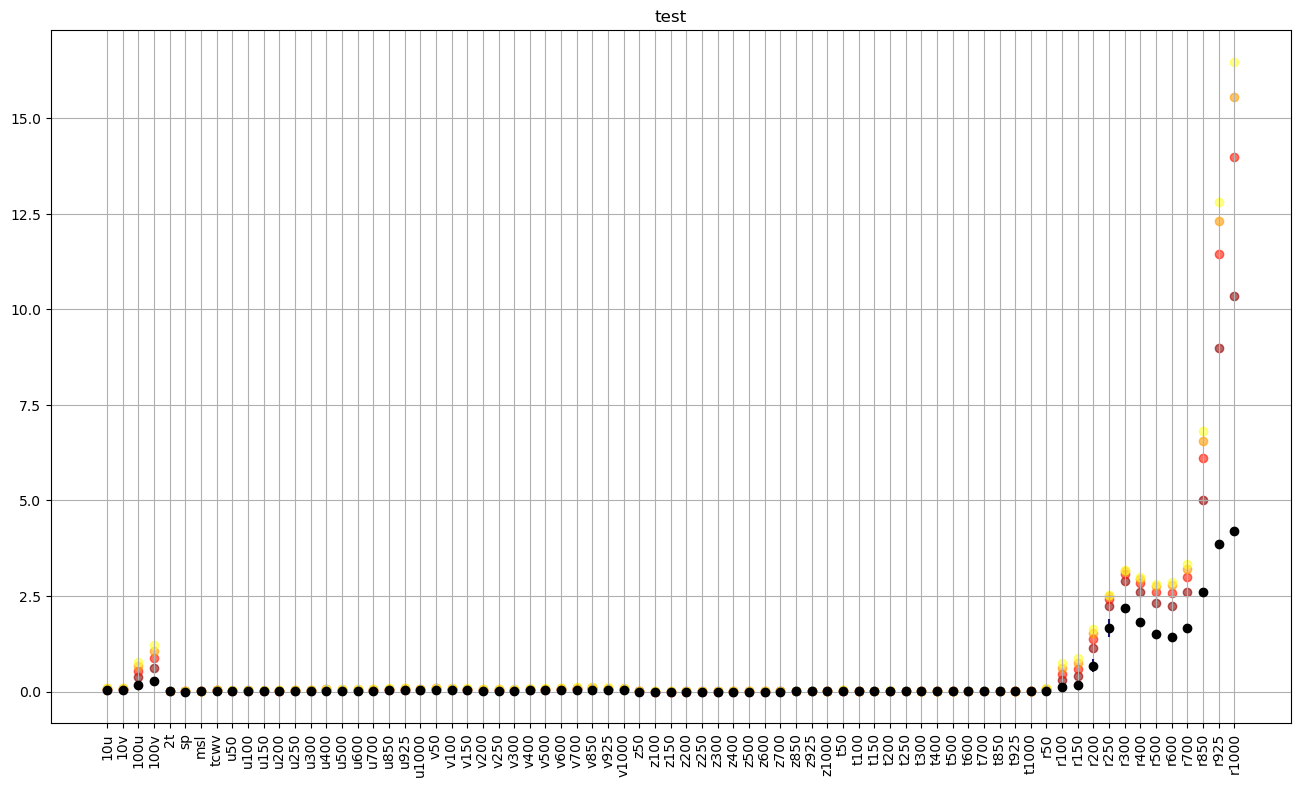

In [36]:
yerr_bottom = std.copy()
yerr_bottom_div = mean - yerr_bottom
yerr_bottom_div[yerr_bottom_div>0]=0
yerr_bottom = yerr_bottom + yerr_bottom_div
yerr = np.array([yerr_bottom,std])
cmap=plt.get_cmap('hot')
fig, ax = plt.subplots(figsize=(16,9))
plt.title(title)
# ax.plot(mean,".")
ax.errorbar(range(mean.shape[1]),mean[0,:],yerr=yerr[:,0,:],fmt='o',c='black',ecolor='midnightblue')
for i in range(1,mean.shape[0]):
    ax.scatter(range(mean.shape[1]),mean[i,:],marker='o',alpha=0.6,color=cmap(i/mean.shape[0]))
    # break
plt.xticks(np.arange(len(ordering)), ordering, rotation='vertical')
plt.grid()
# plt.savefig(os.path.join(save_path,checkpoint+"_"+title+"_validation_steps"+str(val_epochs)+".pdf"))
plt.show()

In [25]:
ordering = [
    "10u",
    "10v",
    "100u",
    "100v",
    "2t",
    "sp",
    "msl",
    "tcwv",
    "u50",
    "u100",
    "u150",
    "u200",
    "u250",
    "u300",
    "u400",
    "u500",
    "u600",
    "u700",
    "u850",
    "u925",
    "u1000",
    "v50",
    "v100",
    "v150",
    "v200",
    "v250",
    "v300",
    "v400",
    "v500",
    "v600",
    "v700",
    "v850",
    "v925",
    "v1000",
    "z50",
    "z100",
    "z150",
    "z200",
    "z250",
    "z300",
    "z400",
    "z500",
    "z600",
    "z700",
    "z850",
    "z925",
    "z1000",
    "t50",
    "t100",
    "t150",
    "t200",
    "t250",
    "t300",
    "t400",
    "t500",
    "t600",
    "t700",
    "t850",
    "t925",
    "t1000",
    "r50",
    "r100",
    "r150",
    "r200",
    "r250",
    "r300",
    "r400",
    "r500",
    "r600",
    "r700",
    "r850",
    "r925",
    "r1000",
]
ordering_reverse = {
    "10m_u_component_of_wind":0,
    "10m_v_component_of_wind":1,
    "100u":2,
    "100v":3,
    "2m_temperature":4,
    "sp":5,
    "msl":6,
    "total_column_water_vapour":7,
}